In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon

PROJECTION_PATH = "/hpc/home/mk423/Anxiety/FullDataWork/Projections/"
sucrose_cd = "SucroseCD_5b5a_net_{}_means.csv"
social_pref = "Anx_Nets_Social_vs_Object_means.csv"

## Sucrose Countdown

Network 1 Results:  WilcoxonResult(statistic=30.0, pvalue=0.8203125)


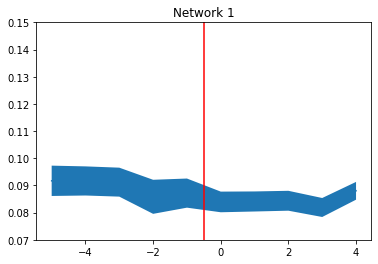

Network 2 Results:  WilcoxonResult(statistic=41.0, pvalue=0.990234375)


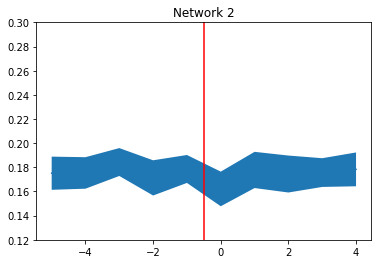

In [29]:
df_sucrose = pd.read_csv(PROJECTION_PATH + sucrose_cd.format(1))

before_scores = df_sucrose["5"]
after_scores = df_sucrose["6"]

results = wilcoxon(before_scores,after_scores,alternative="less")
print("Network 1 Results: ",results)

mean_score = np.mean(df_sucrose[np.arange(1,11).astype(str)].values,axis=0)
sterr_score = np.std(df_sucrose[np.arange(1,11).astype(str)].values,axis=0) / np.sqrt(df_sucrose.shape[0])

plt.plot(np.arange(-5,5),mean_score)
plt.fill_between(np.arange(-5,5),mean_score + sterr_score, mean_score - sterr_score)
plt.axvline(-0.5,color="red")
plt.ylim([0.07,0.15])
plt.title("Network 1")
plt.show()

df_sucrose = pd.read_csv(PROJECTION_PATH + sucrose_cd.format(2))

before_scores = df_sucrose["5"]
after_scores = df_sucrose["6"]

results = wilcoxon(before_scores,after_scores,alternative="less")
print("Network 2 Results: ",results)

mean_score = np.mean(df_sucrose[np.arange(1,11).astype(str)].values,axis=0)
sterr_score = np.std(df_sucrose[np.arange(1,11).astype(str)].values,axis=0) / np.sqrt(df_sucrose.shape[0])

plt.plot(np.arange(-5,5),mean_score)
plt.fill_between(np.arange(-5,5),mean_score + sterr_score, mean_score - sterr_score)
plt.axvline(-0.5,color="red")
plt.ylim([0.12,0.3])
plt.title("Network 2")
plt.show()

## Social Preference

In [37]:
social_df = pd.read_csv(PROJECTION_PATH + social_pref)
analysis_mice = ["Mouse0630","Mouse0631","Mouse0632","Mouse0633",
                 "Mouse0634","Mouse0640","Mouse0641","Mouse0642",
                 "Mouse0643","Mouse0644","Mouse5321","Mouse5331"]
social_df = social_df[social_df["mouse"].isin(analysis_mice)]

Network 1 Social Preference Results:  WilcoxonResult(statistic=60.0, pvalue=0.953857421875)


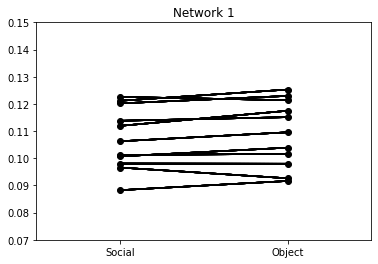

Network 2 Social Preference Results:  WilcoxonResult(statistic=47.0, pvalue=0.74072265625)


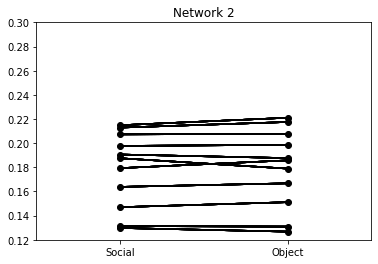

In [46]:
#network 1
results = wilcoxon(social_df["object mean net 1"],social_df["social mean net 1"],alternative="less")
print("Network 1 Social Preference Results: ",results)

x1 = np.zeros(social_df.shape[0])
x2 = np.ones(social_df.shape[0])

y1 = social_df["social mean net 1"]
y2 = social_df["object mean net 1"]

for p1,p2 in zip(y1,y2):
    plt.plot([0,1],[y1,y2],color="black")
    
plt.scatter(x1,y1,color="black")
plt.scatter(x2,y2,color="black")
plt.ylim([0.07,0.15])
plt.xticks([0,1],["Social","Object"])
plt.xlim([-0.5,1.5])
plt.title("Network 1")
plt.show()

#network 2
results = wilcoxon(social_df["object mean net 2"],social_df["social mean net 2"],alternative="less")
print("Network 2 Social Preference Results: ",results)

x1 = np.zeros(social_df.shape[0])
x2 = np.ones(social_df.shape[0])

y1 = social_df["social mean net 2"]
y2 = social_df["object mean net 2"]

for p1,p2 in zip(y1,y2):
    plt.plot([0,1],[y1,y2],color="black")
    
plt.scatter(x1,y1,color="black")
plt.scatter(x2,y2,color="black")
plt.ylim([0.12,0.30])
plt.xticks([0,1],["Social","Object"])
plt.xlim([-0.5,1.5])
plt.title("Network 2")
plt.show()